In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [72]:
#Importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [73]:
original_columns = df.columns.tolist()
original_columns

['1',
 '1.52101',
 '13.64',
 '4.49',
 '1.10',
 '71.78',
 '0.06',
 '8.75',
 '0.00',
 '0.00.1',
 '1.1']

In [74]:
original_columns[8]='0.0'
original_columns[9]='0.0'
original_columns[10]='1'
original_columns

['1',
 '1.52101',
 '13.64',
 '4.49',
 '1.10',
 '71.78',
 '0.06',
 '8.75',
 '0.0',
 '0.0',
 '1']

In [75]:
new_columns = ['id_no.', 'refractive index', 'sodium','magnesium','aluminium','silicon','potassium','calcium','barium','iron','type_of_glass']
df.columns = new_columns

In [76]:
df.loc[-1]=original_columns
df.index+=1

In [77]:
df.sort_index(inplace=True)

In [78]:
df

,id_no.,refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.0,8.4,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7


In [79]:
#Checking dimensions of dataset
df.shape

(214, 11)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_no.            214 non-null    object
 1   refractive index  214 non-null    object
 2   sodium            214 non-null    object
 3   magnesium         214 non-null    object
 4   aluminium         214 non-null    object
 5   silicon           214 non-null    object
 6   potassium         214 non-null    object
 7   calcium           214 non-null    object
 8   barium            214 non-null    object
 9   iron              214 non-null    object
 10  type_of_glass     214 non-null    object
dtypes: object(11)
memory usage: 20.1+ KB


In [82]:
df.isnull().sum()

id_no.              0
refractive index    0
sodium              0
magnesium           0
aluminium           0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [83]:
df['id_no.'] = df['id_no.'].astype(float)
df['refractive index']=df['refractive index'].astype(float)
df['sodium']=df['sodium'].astype(float)
df['magnesium']=df['magnesium'].astype(float)
df['aluminium']=df['aluminium'].astype(float)
df['silicon']=df['silicon'].astype(float)
df['potassium']=df['potassium'].astype(float)
df['calcium']=df['calcium'].astype(float)
df['barium']=df['barium'].astype(float)
df['iron']=df['iron'].astype(float)
df['type_of_glass']=df['type_of_glass'].astype(float)

In [85]:
df.describe()

,id_no.,refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_no.            214 non-null    float64
 1   refractive index  214 non-null    float64
 2   sodium            214 non-null    float64
 3   magnesium         214 non-null    float64
 4   aluminium         214 non-null    float64
 5   silicon           214 non-null    float64
 6   potassium         214 non-null    float64
 7   calcium           214 non-null    float64
 8   barium            214 non-null    float64
 9   iron              214 non-null    float64
 10  type_of_glass     214 non-null    float64
dtypes: float64(11)
memory usage: 20.1 KB


In [90]:
df = df.drop('id_no.',1)

In [91]:
df.head()

,refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [92]:
#Seperating Features and Labels

features = ['refractive index', 'sodium','magnesium','aluminium','silicon','potassium','calcium','barium','iron']
label = ['type_of_glass']

X = df[features]
Y = df[label]

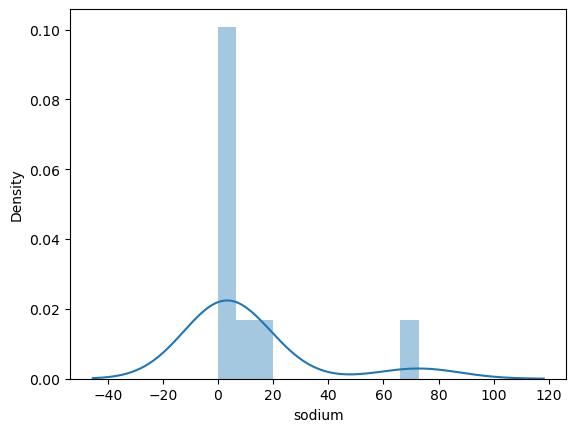

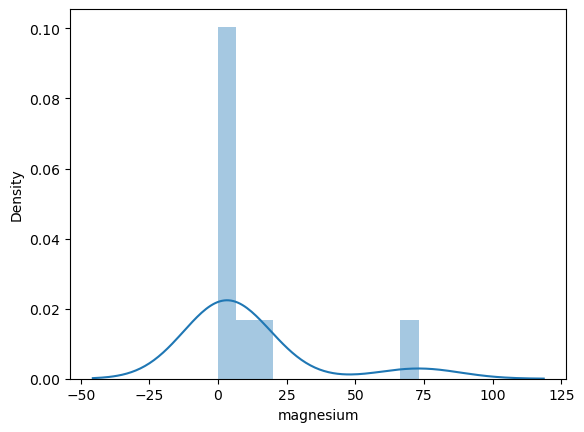

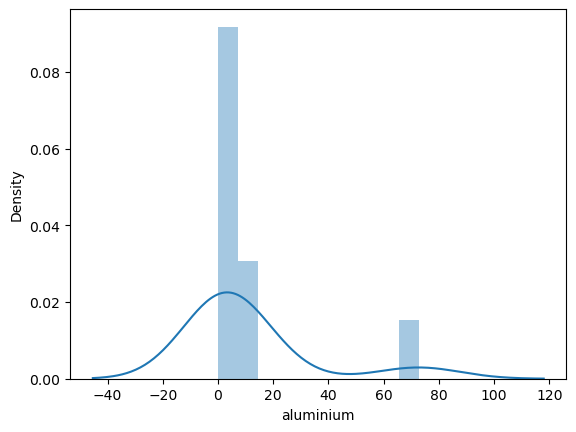

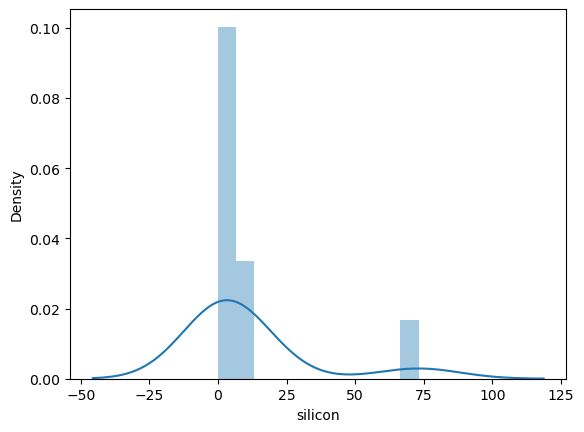

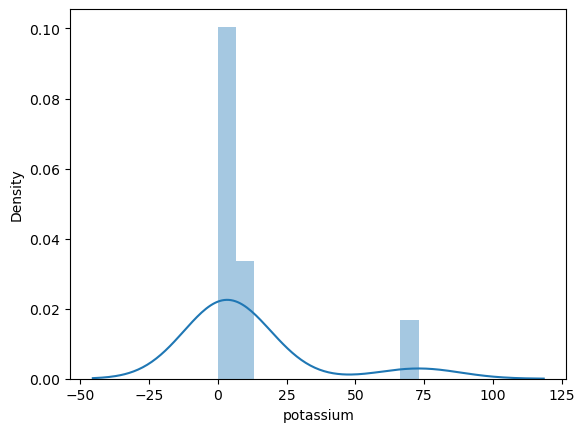

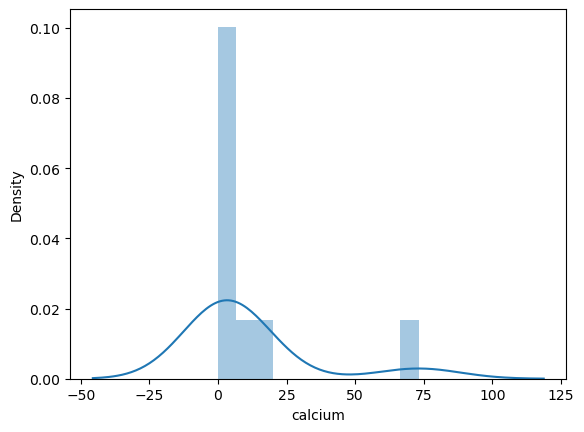

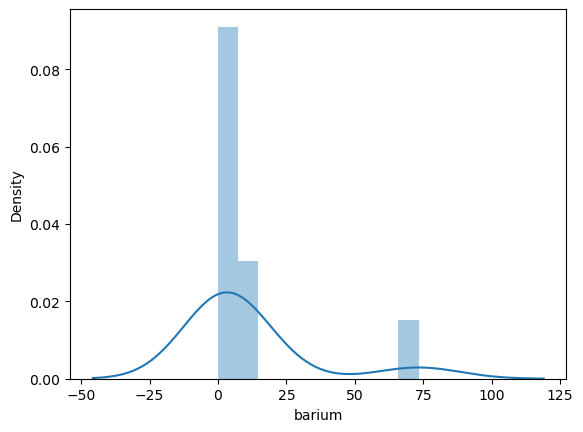

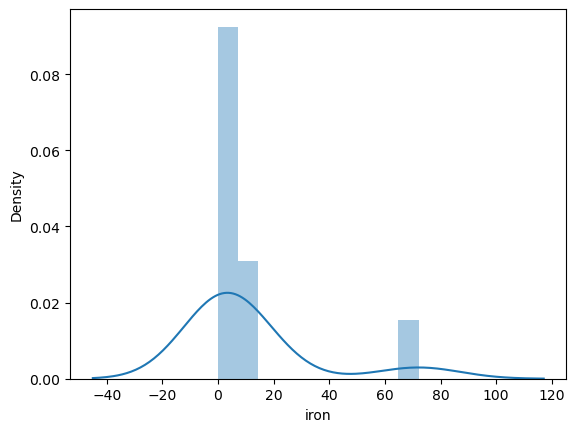

In [93]:
X2 = X.values

for i in range(1,9):
        sns.distplot(X2[i])
        plt.xlabel(features[i])
        plt.show()

Observation:
Dataset is skewed

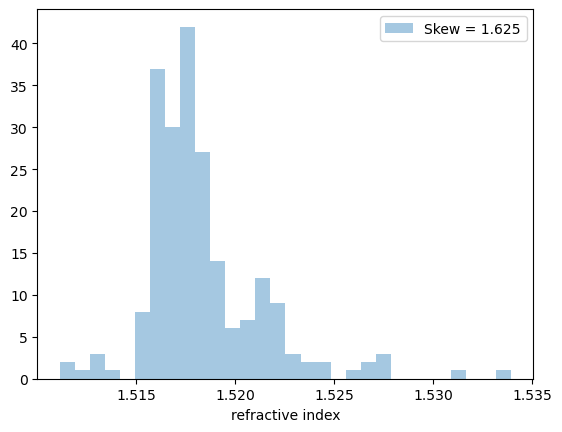

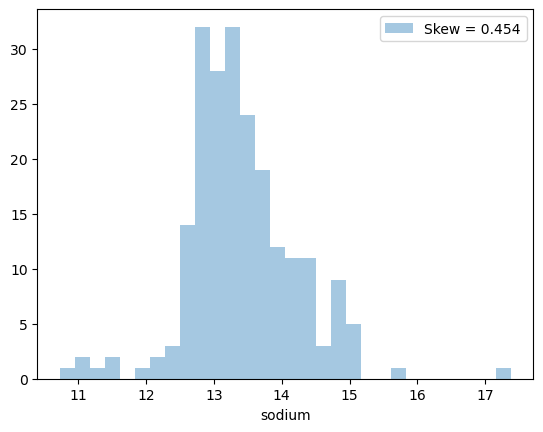

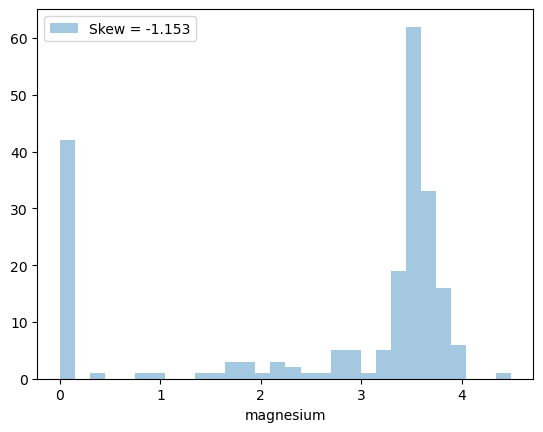

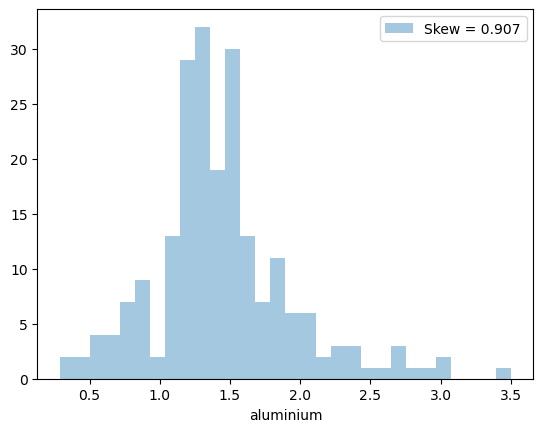

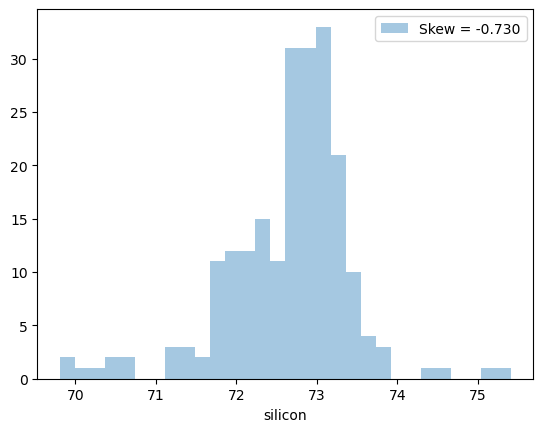

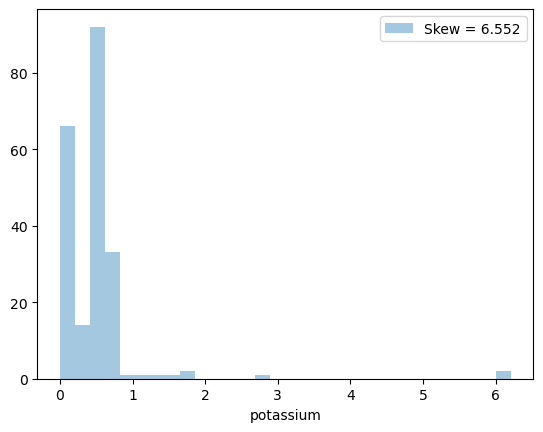

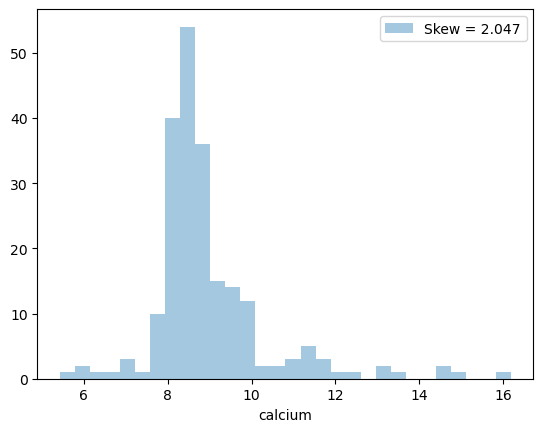

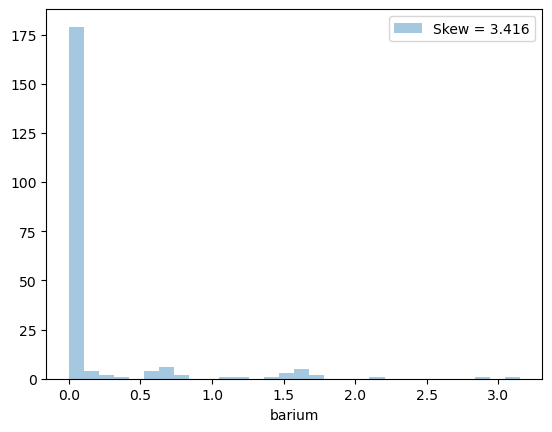

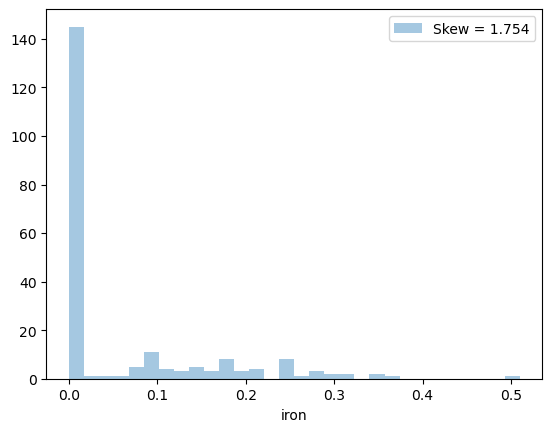

In [94]:
for f in features:
    skew = df[f].skew()
    sns.distplot(df[f], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Observations:

1. The distribution of potassium and barium seem to contain outliers.
2. The features iron, barium, calcium and potassium are Highly Skewed.
3. None of the features are normally distributed.

<Figure size 800x800 with 0 Axes>

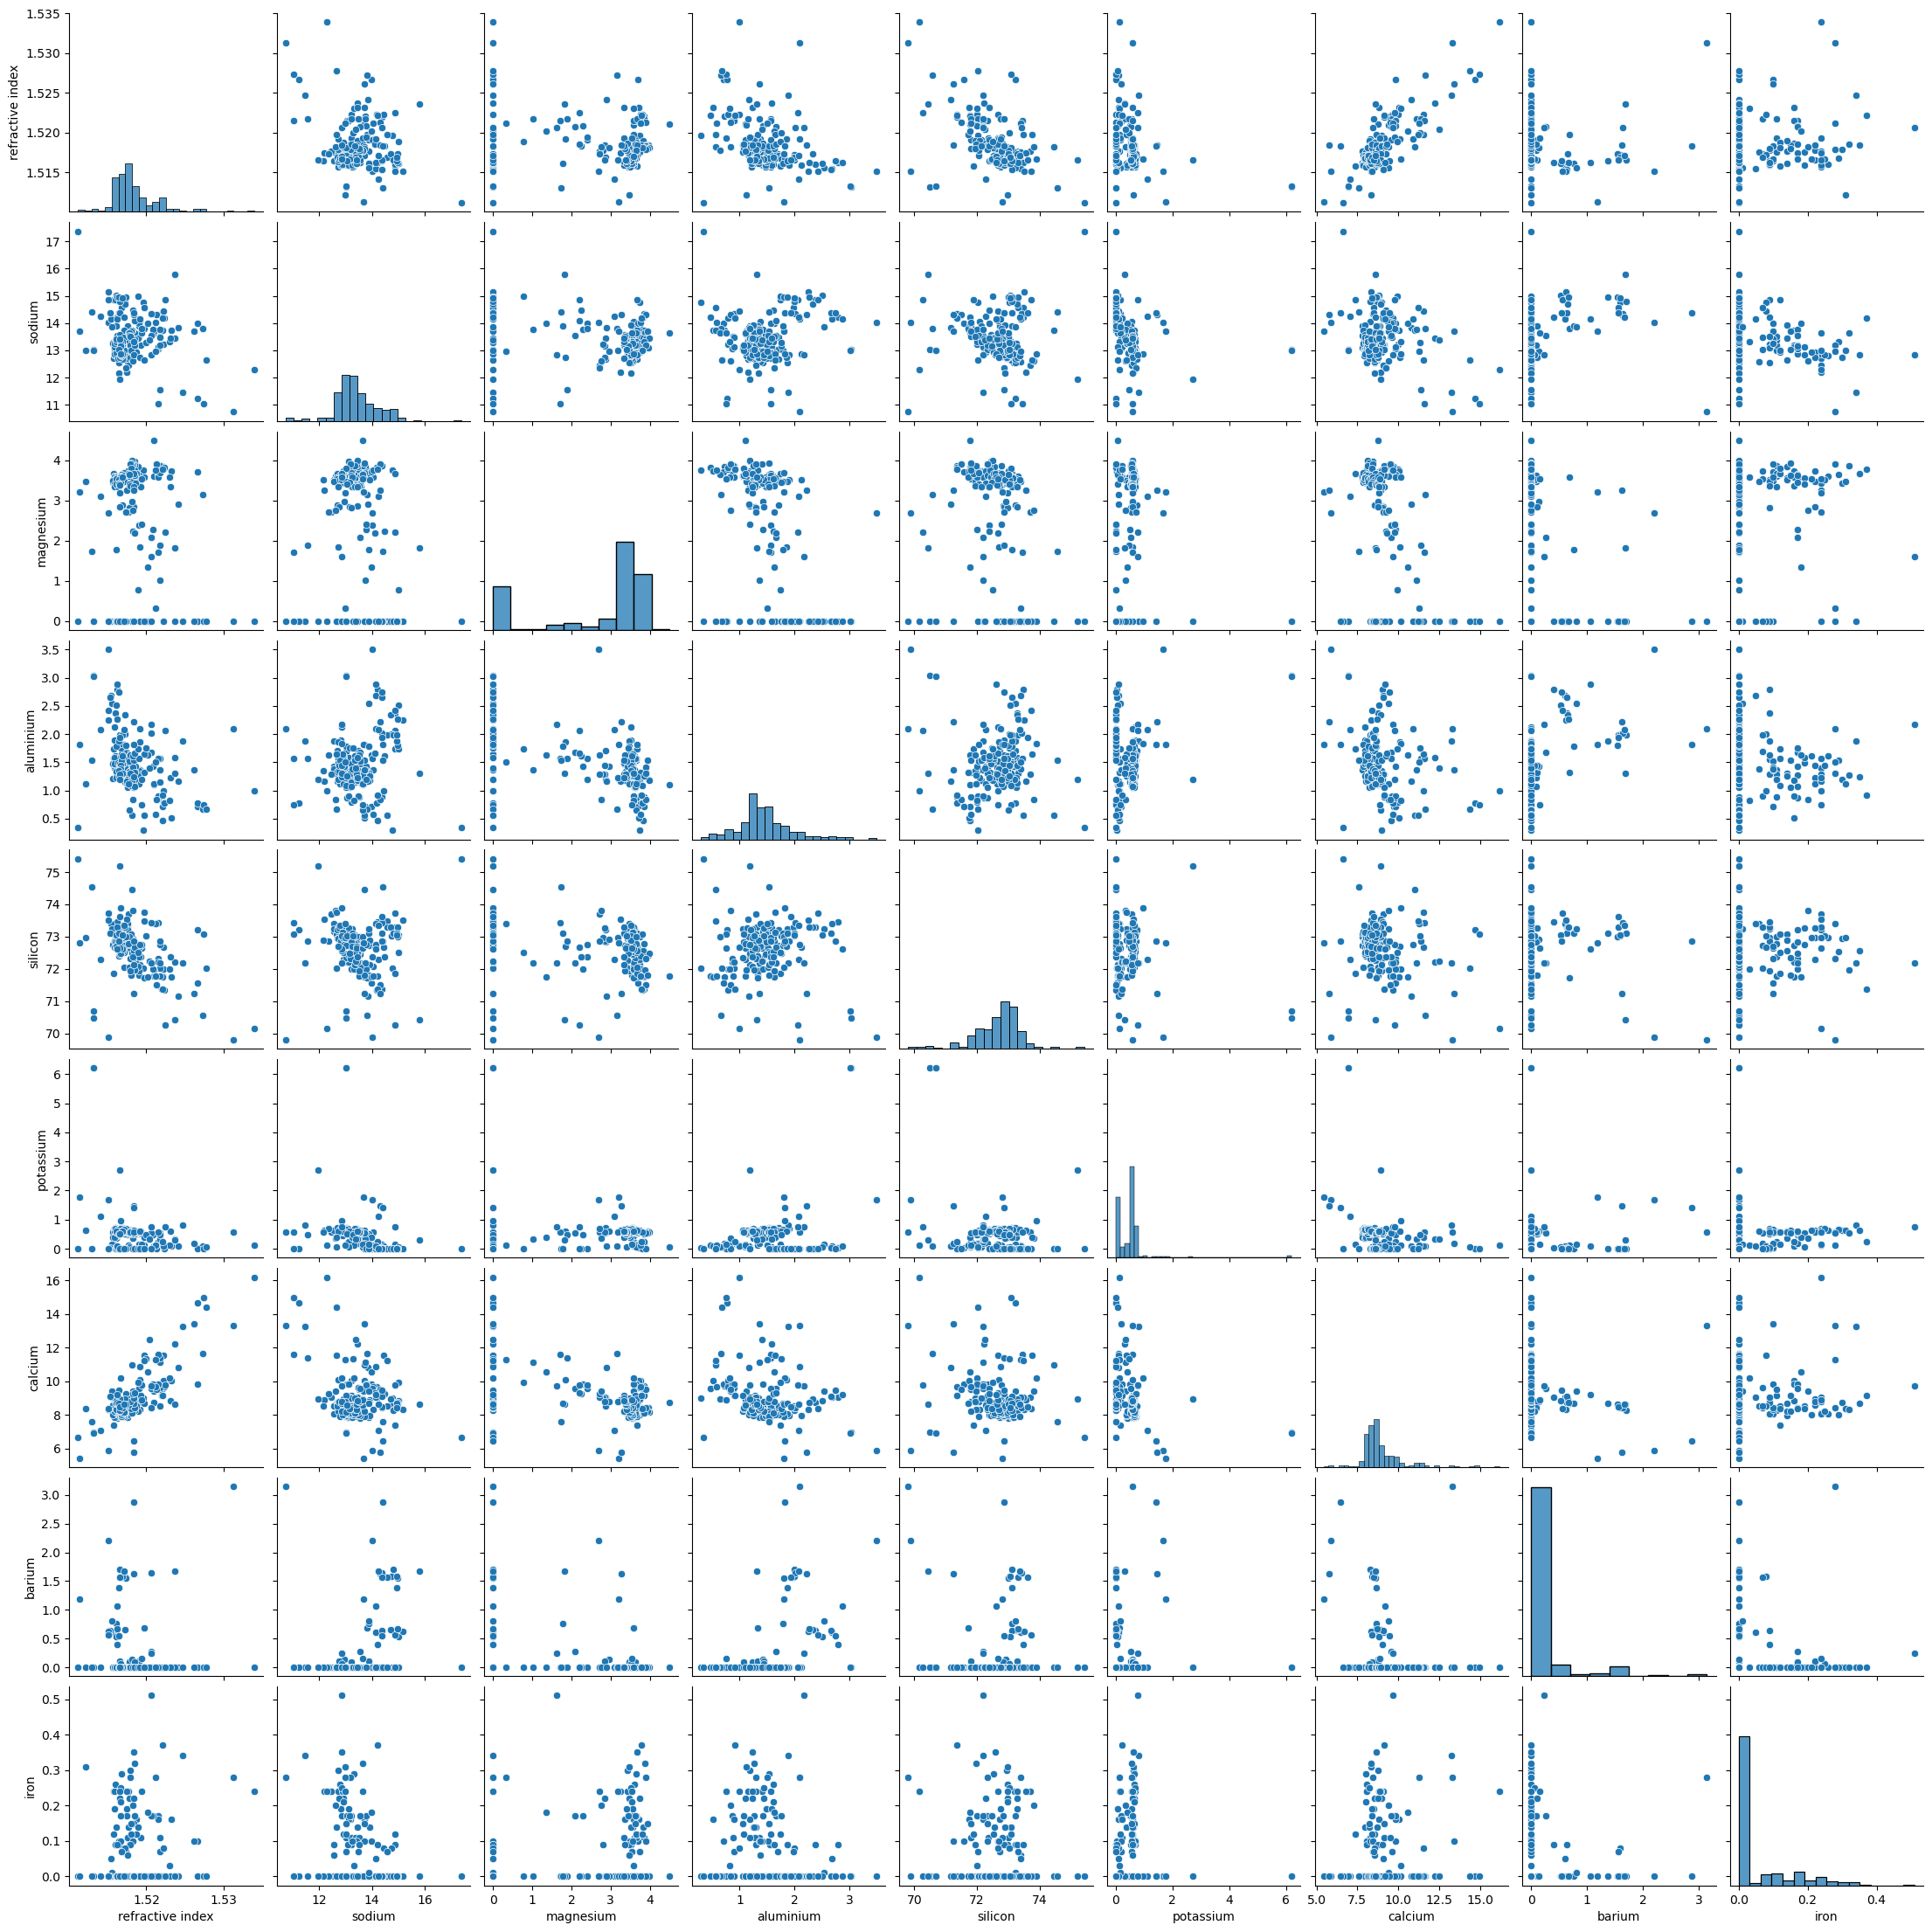

In [96]:
X2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=X2)
plt.show()

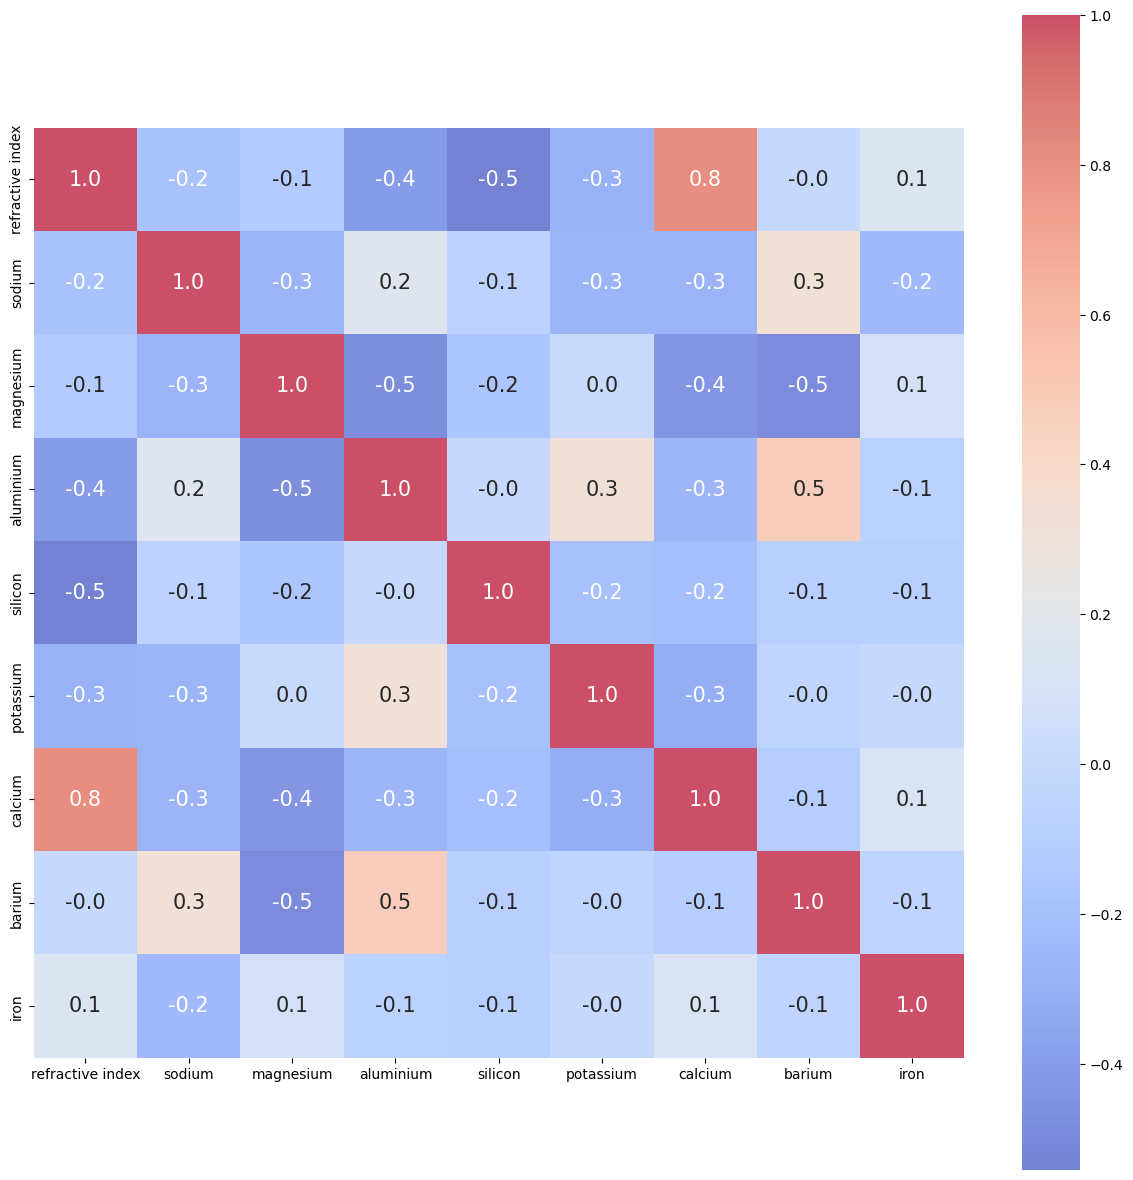

In [97]:
#Using co-relation matrix
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

In [101]:
from collections import Counter

#Detecting observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in df.columns.tolist():
       
        Q1 = np.percentile(df[col], 25)
        
       
        Q3 = np.percentile(df[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col)
        
   
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   
     

The dataset contains 14 observations with more than 2 outliers


In [ ]:
#Data Treatment

In [102]:
#Removing Outliers
outlier_indices = outlier_hunt(df[features])
df1 = df.drop(outlier_indices).reset_index(drop=True)

print(df.shape)

(214, 10)


In [103]:
#Normalising Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [104]:
#Scaling features
from sklearn import preprocessing
X=preprocessing.scale(X)

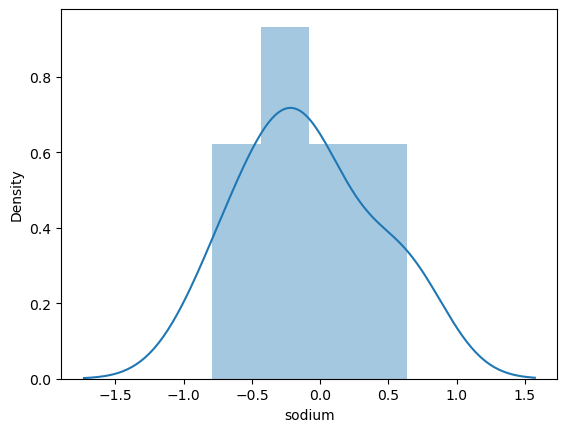

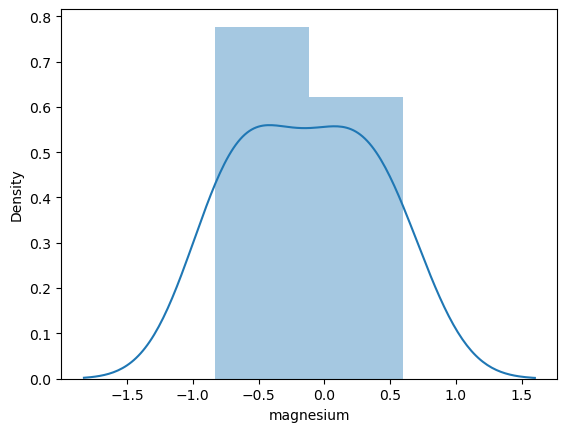

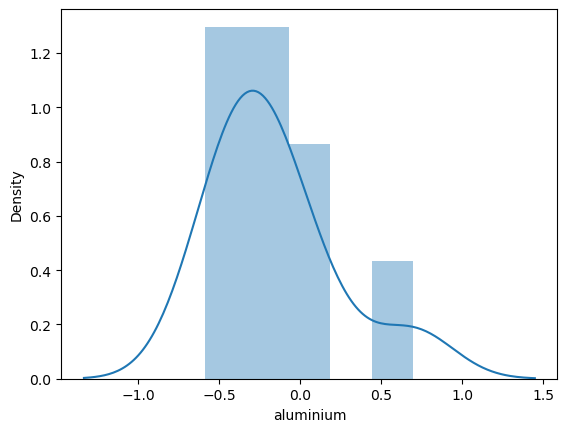

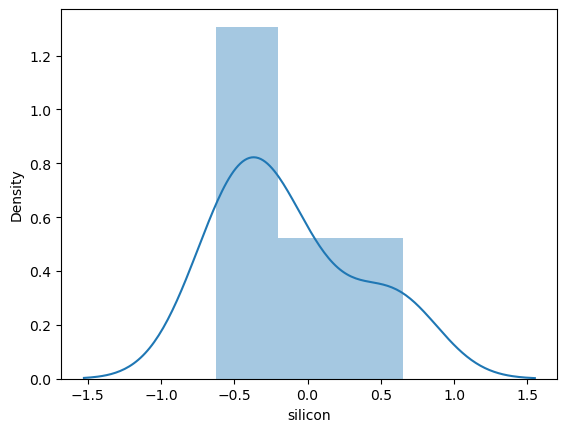

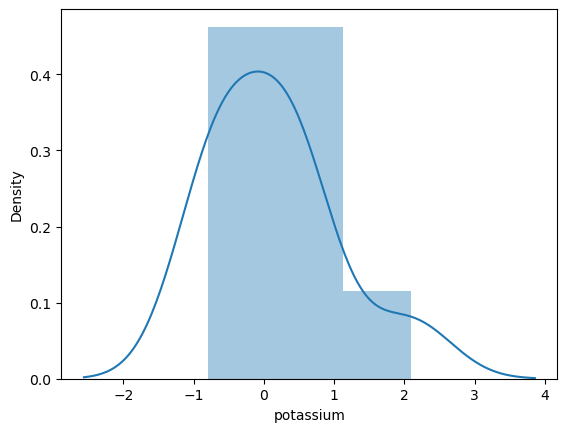

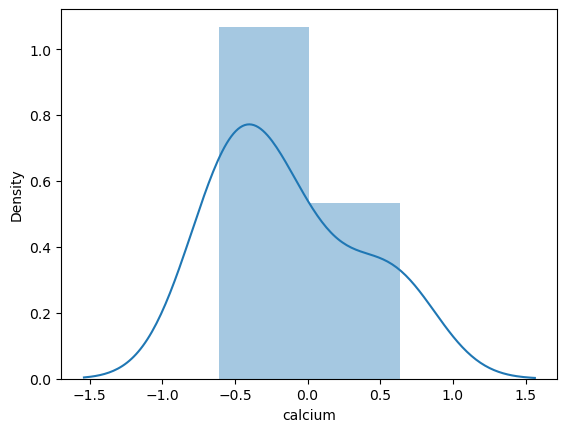

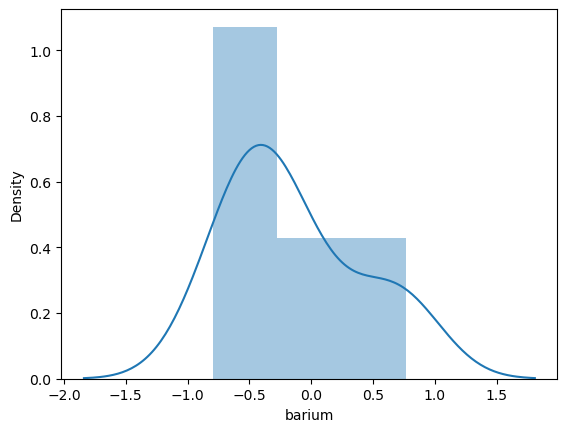

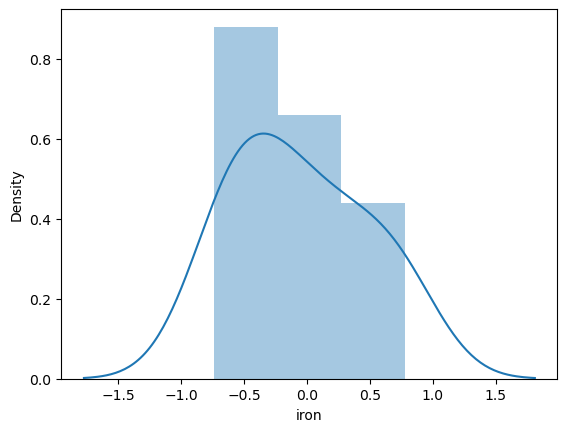

In [105]:
#Data Visualisation after preprocessing
X2 = X
for i in range(1,9):
        sns.distplot(X2[i])
        plt.xlabel(features[i])
        plt.show()

#Results
1. Skewness reduced
2. Data normalized

In [106]:
#Train and Test split

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0,stratify=Y)

Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of Y_train = ' + str(Y_train.shape))
print('Shape of Y_test = ' + str(Y_test.shape))
     

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of Y_train = (160,)
Shape of Y_test = (54,)


In [111]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test,Y_test)
    Scores.append(score)

print(knn.score(X_train,Y_train))
print(Scores)

0.65625
[0.6666666666666666, 0.6296296296296297, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407]


In [113]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, Y_train)
    score = tree.score(X_test,Y_test)
    Scores.append(score)

print(tree.score(X_train,Y_train))
print(Scores)

1.0
[0.7037037037037037]


In [115]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, Y_train)
    score = logistic.score(X_test,Y_test)
    Scores.append(score)
    
print(logistic.score(X_train,Y_train))
print(Scores)

0.65
[0.6296296296296297]


In [116]:
#SVM Classifier (Non-Linear)

from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, Y_train)
    score = svc.score(X_test,Y_test)
    Scores.append(score)

print(svc.score(X_train,Y_train))
print(Scores)

0.76875
[0.7407407407407407]


#Summary

Out of all above models:

Decision tree is overfitting:
Training accuracy: 1.0
Testing accuracy: 0.7037037037037037

SVM (Non Linear Kernal) is giving best results:
Training accuracy: 0.76875
Testing accuracy: 0.7407407407407407